# Extracting Vaccination Data, Vaccination sites and number of sesssion data from the api link (Only available from 08-03-2021)

In [1]:
import datetime as datetime
from datetime import timedelta

import requests
import json

import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression   # Linear regression
from sklearn.preprocessing import PolynomialFeatures  # Polynomial regression
from sklearn.tree import DecisionTreeRegressor  # Decision tree regression


In [2]:

vaccine_data2=[]
vaccine_data_by_age2=[]
vaccine_sites2=[]
vaccine_sessions2=[]
import time

def extract_data(start, end):
    while start<= end:
        #Using requests to extract the data from the api
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    start = time.time()
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_data1=r['topBlock']['vaccination'] #08March onwards data is there in the API
        vaccine_data2.append(vaccine_data1) #Storing the vaccine_0date in a list
        vaccine_sites1=r['topBlock']['sites'] #08March onwards data is there in the API
        vaccine_sites2.append(vaccine_sites1) #Storing the vaccine sites data in a list
        vaccine_sessions1=r['topBlock']['sessions'] #08March onwards data is there in the API
        vaccine_sessions2.append(vaccine_sessions1) #Storing the vaccine sessions in a list
    end = time.time()
    print(f"The time taken to run the above block of code is {end - start}")
        
        

The time taken to run the above block of code is 390.11135625839233


In [ ]:
vaccine_stateid=[]
states=[]
title=[]
total=[]
partial_vaccinated=[]
fully_vaccinated=[]
vaccine_date=[]
vaccine_state_title=[]
def extract_data(start, end):
    while start<= end:
        #Using requests to extract the data from the api
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    start = time.time()
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_stateid2=r['getBeneficiariesGroupBy']
        vaccine_date1=r['timestamp']
        for k in vaccine_stateid2:
          states2=k['state_id']
          states.append(states2)
          title2=k['title']
          title.append(title2)
          total2=k['total']
          total.append(total2)
          partial_vaccinated2=k['partial_vaccinated']
          partial_vaccinated.append(partial_vaccinated2)
          fully_vaccinated2=k['totally_vaccinated']
          fully_vaccinated.append(fully_vaccinated2)
        vaccine_date.append(vaccine_date1)
          #08March onwards data is there in the API
        vaccine_stateid.append(vaccine_stateid2) #Storing the vaccine sessions in a list

    end = time.time()
    print(f"The time taken to run the above block of code is {end - start}")

The time taken to run the above block of code is 354.24896788597107


In [ ]:
len(vaccine_date)

281

In [ ]:
date_vaccine=[]

In [ ]:
new_list=[]
from itertools import repeat
for i in range(0,len(vaccine_date)):
  new_list.extend(repeat(vaccine_date[i],37))

#new_list.extend([vaccine_date for j in (vaccine_date) for i in range(0,len(vaccine_date))])
print(new_list)
len(new_list)

['2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-08 18:00:53', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-09 18:01:28', '2021-03-0

10397

In [ ]:
Vaccination_data_statewise = pd.DataFrame(
    {'state_id': states,
     'Title': title,
     'Total': total,
     'Partial vaccinated':partial_vaccinated,
     'Fully Vaccinated':fully_vaccinated
    })
print(Vaccination_data_statewise)

      state_id  ... Fully Vaccinated
0            1  ...             2374
1            2  ...           196326
2            3  ...            10494
3            4  ...            61223
4            5  ...           210740
...        ...  ...              ...
10392       33  ...          2082679
10393       34  ...         59720147
10394       35  ...          5702126
10395       36  ...         33502805
10396       37  ...           227372

[10397 rows x 5 columns]


In [ ]:
Vaccination_data_statewise['Title'].value_counts()

Nagaland                       281
Odisha                         281
Telangana                      281
Himachal Pradesh               281
Delhi                          281
Gujarat                        281
West Bengal                    281
Uttar Pradesh                  281
Tripura                        281
Sikkim                         281
Puducherry                     281
Karnataka                      281
Bihar                          281
Chandigarh                     281
Chhattisgarh                   281
Jharkhand                      281
Punjab                         281
Assam                          281
Tamil Nadu                     281
Meghalaya                      281
Goa                            281
Madhya Pradesh                 281
Rajasthan                      281
Andaman and Nicobar Islands    281
Ladakh                         281
Kerala                         281
Manipur                        281
Jammu and Kashmir              281
Daman and Diu       

In [ ]:
Vaccination_data_statewise.head(40)

,state_id,Title,Total,Partial vaccinated,Fully Vaccinated
0,1,Andaman and Nicobar Islands,9634,7260,2374
1,2,Andhra Pradesh,693146,496820,196326
2,3,Arunachal Pradesh,39569,29075,10494
3,4,Assam,391651,330428,61223
4,5,Bihar,783296,572556,210740
5,6,Chandigarh,30339,26736,3603
6,7,Chhattisgarh,561149,427770,133379
7,8,Dadra and Nagar Haveli,6868,5746,1122
8,9,Delhi,458286,382337,75949
9,10,Goa,40444,33101,7343


In [ ]:
Vaccination_data_statewise['Date']=new_list

In [ ]:
Vaccination_data_statewise

,state_id,Title,Total,Partial vaccinated,Fully Vaccinated,Date
0,1,Andaman and Nicobar Islands,9634,7260,2374,2021-03-08 18:00:53
1,2,Andhra Pradesh,693146,496820,196326,2021-03-08 18:00:53
2,3,Arunachal Pradesh,39569,29075,10494,2021-03-08 18:00:53
3,4,Assam,391651,330428,61223,2021-03-08 18:00:53
4,5,Bihar,783296,572556,210740,2021-03-08 18:00:53
...,...,...,...,...,...,...
10392,33,Tripura,4645191,2562512,2082679,2021-12-13 23:30
10393,34,Uttar Pradesh,178762401,119042254,59720147,2021-12-13 23:30
10394,35,Uttarakhand,13377902,7675776,5702126,2021-12-13 23:30
10395,36,West Bengal,97607359,64104554,33502805,2021-12-13 23:30


In [ ]:
Vaccination_data_statewise.to_csv("vaccination_statewise.csv")

In [45]:
vaccine_dataframe1=pd.DataFrame(vaccine_data2) # Converting into a dataframe

In [46]:
#replacing Not-a-Number value to 0

vaccine_dataframe1 = vaccine_dataframe1.replace(np.NaN, 0)
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1332080765,680323004,647271648,306985,1181729218,145019441,1884923,817015228.0,515065537.0,1.332081e+09,0.0,0.0,0.0,0.0,37901.0,726834.0,1158089.0,955939.0,928473.0,511.0,27.0,1152978.0,8938070.0,2303902.0,6634168.0
280,1338966546,683708234,650770436,308748,1188051086,145582163,6655126,818972793.0,519993753.0,1.338967e+09,0.0,0.0,0.0,0.0,37942.0,1860483.0,4794643.0,3268802.0,3384619.0,1704.0,318.0,1154169.0,1899465.0,734918.0,1164547.0
281,1346406033,687358920,654557272,310713,1194888934,146182587,6840844,821007374.0,525398659.0,1.346406e+09,0.0,0.0,0.0,0.0,38235.0,1822766.0,5018078.0,3352794.0,3486215.0,1835.0,217.0,1155384.0,6685988.0,1873371.0,4812617.0
282,1352808690,690509562,657807748,312252,1200713108,146759869,5966688,822665030.0,530143660.0,1.352809e+09,0.0,0.0,0.0,0.0,38450.0,1506948.0,4459740.0,2932489.0,3032773.0,1426.0,357.0,1156585.0,6871258.0,1833659.0,5037599.0


#Creating the dates column to be added to the dataframe 

In [47]:
#https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
#https://docs.python.org/3/library/datetime.html


start_date = datetime.date(2021, 3, 8)   # start date
end_date = datetime.date.today()    # end date
time_diff=end_date-start_date  
dates_vaccine=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [48]:
dates_vaccine

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
               '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16'],
              dtype='datetime64[ns]', length=284, freq='D')

In [49]:
type(dates_vaccine)


pandas.core.indexes.datetimes.DatetimeIndex

In [50]:
#Adding the date column
vaccine_dataframe1['dates_vaccine']=dates_vaccine 

In [51]:
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1332080765,680323004,647271648,306985,1181729218,145019441,1884923,817015228.0,515065537.0,1.332081e+09,0.0,0.0,0.0,0.0,37901.0,726834.0,1158089.0,955939.0,928473.0,511.0,27.0,1152978.0,8938070.0,2303902.0,6634168.0,2021-12-12
280,1338966546,683708234,650770436,308748,1188051086,145582163,6655126,818972793.0,519993753.0,1.338967e+09,0.0,0.0,0.0,0.0,37942.0,1860483.0,4794643.0,3268802.0,3384619.0,1704.0,318.0,1154169.0,1899465.0,734918.0,1164547.0,2021-12-13
281,1346406033,687358920,654557272,310713,1194888934,146182587,6840844,821007374.0,525398659.0,1.346406e+09,0.0,0.0,0.0,0.0,38235.0,1822766.0,5018078.0,3352794.0,3486215.0,1835.0,217.0,1155384.0,6685988.0,1873371.0,4812617.0,2021-12-14
282,1352808690,690509562,657807748,312252,1200713108,146759869,5966688,822665030.0,530143660.0,1.352809e+09,0.0,0.0,0.0,0.0,38450.0,1506948.0,4459740.0,2932489.0,3032773.0,1426.0,357.0,1156585.0,6871258.0,1833659.0,5037599.0,2021-12-15


In [52]:
vaccine_dataframe1.insert(0, 'date_index', np.arange(0, len(vaccine_dataframe1)))

In [53]:
#Removing the last row because it has incomplete data

vaccine_dataframe = vaccine_dataframe1[1:-1]

vaccine_dataframe.set_index('date_index')

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
date_index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,1329632246,679092364,646054420,306334,1179505367,144795630,8903120,816062191.0,513570055.0,1.329632e+09,0.0,0.0,0.0,0.0,37785.0,2289161.0,6613959.0,4316671.0,4584196.0,2253.0,163.0,1152121.0,7618392.0,2050927.0,5567465.0,2021-12-11
279,1332080765,680323004,647271648,306985,1181729218,145019441,1884923,817015228.0,515065537.0,1.332081e+09,0.0,0.0,0.0,0.0,37901.0,726834.0,1158089.0,955939.0,928473.0,511.0,27.0,1152978.0,8938070.0,2303902.0,6634168.0,2021-12-12
280,1338966546,683708234,650770436,308748,1188051086,145582163,6655126,818972793.0,519993753.0,1.338967e+09,0.0,0.0,0.0,0.0,37942.0,1860483.0,4794643.0,3268802.0,3384619.0,1704.0,318.0,1154169.0,1899465.0,734918.0,1164547.0,2021-12-13


In [54]:
#Storing the resultant dataframe into a csv file.
vaccine_dataframe.to_csv('vaccine_dataframe.csv')
vaccine_dataframe_excel = vaccine_dataframe.to_excel('vaccine_dataframe.xlsx')

<AxesSubplot:>

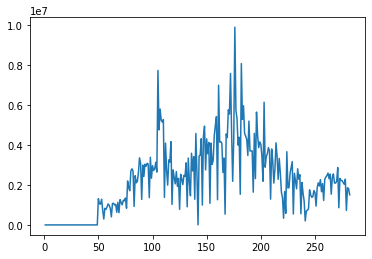

In [55]:
vaccine_dataframe['today_dose_one'].plot()

In [56]:
#Replacing the null values with 0
vaccine_dataframe = vaccine_dataframe.replace(np.NaN, 0)
vaccine_dataframe

,date_index,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
1,1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,278,1329632246,679092364,646054420,306334,1179505367,144795630,8903120,816062191.0,513570055.0,1.329632e+09,0.0,0.0,0.0,0.0,37785.0,2289161.0,6613959.0,4316671.0,4584196.0,2253.0,163.0,1152121.0,7618392.0,2050927.0,5567465.0,2021-12-11
279,279,1332080765,680323004,647271648,306985,1181729218,145019441,1884923,817015228.0,515065537.0,1.332081e+09,0.0,0.0,0.0,0.0,37901.0,726834.0,1158089.0,955939.0,928473.0,511.0,27.0,1152978.0,8938070.0,2303902.0,6634168.0,2021-12-12
280,280,1338966546,683708234,650770436,308748,1188051086,145582163,6655126,818972793.0,519993753.0,1.338967e+09,0.0,0.0,0.0,0.0,37942.0,1860483.0,4794643.0,3268802.0,3384619.0,1704.0,318.0,1154169.0,1899465.0,734918.0,1164547.0,2021-12-13
281,281,1346406033,687358920,654557272,310713,1194888934,146182587,6840844,821007374.0,525398659.0,1.346406e+09,0.0,0.0,0.0,0.0,38235.0,1822766.0,5018078.0,3352794.0,3486215.0,1835.0,217.0,1155384.0,6685988.0,1873371.0,4812617.0,2021-12-14


<AxesSubplot:>

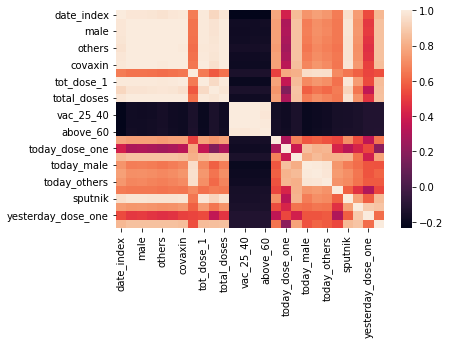

In [57]:
import seaborn as sns
sns.heatmap(vaccine_dataframe1.corr())

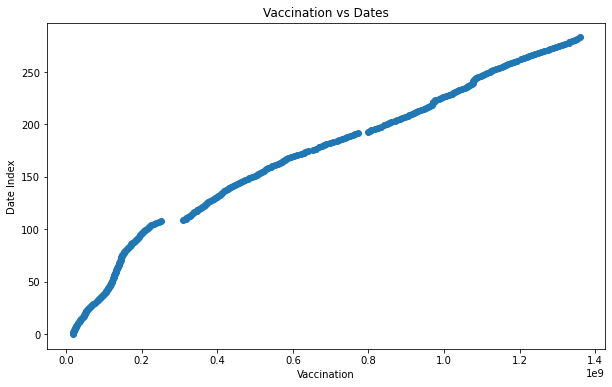

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(vaccine_dataframe1['total'],vaccine_dataframe1['date_index'])
ax.set(title = "Vaccination vs Dates",
       xlabel = "Vaccination",
       ylabel = "Date Index")

plt.show()

In [59]:
first_c = vaccine_dataframe.pop('dates_vaccine')
vaccine_dataframe.insert(1, 'dates_vaccine', first_c)
vaccine_dataframe

#vaccine_dataframe.set_index('date_index')

,date_index,dates_vaccine,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
1,1,2021-03-09,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-03-10,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-03-11,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-03-12,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-03-13,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,278,2021-12-11,1329632246,679092364,646054420,306334,1179505367,144795630,8903120,816062191.0,513570055.0,1.329632e+09,0.0,0.0,0.0,0.0,37785.0,2289161.0,6613959.0,4316671.0,4584196.0,2253.0,163.0,1152121.0,7618392.0,2050927.0,5567465.0
279,279,2021-12-12,1332080765,680323004,647271648,306985,1181729218,145019441,1884923,817015228.0,515065537.0,1.332081e+09,0.0,0.0,0.0,0.0,37901.0,726834.0,1158089.0,955939.0,928473.0,511.0,27.0,1152978.0,8938070.0,2303902.0,6634168.0
280,280,2021-12-13,1338966546,683708234,650770436,308748,1188051086,145582163,6655126,818972793.0,519993753.0,1.338967e+09,0.0,0.0,0.0,0.0,37942.0,1860483.0,4794643.0,3268802.0,3384619.0,1704.0,318.0,1154169.0,1899465.0,734918.0,1164547.0
281,281,2021-12-14,1346406033,687358920,654557272,310713,1194888934,146182587,6840844,821007374.0,525398659.0,1.346406e+09,0.0,0.0,0.0,0.0,38235.0,1822766.0,5018078.0,3352794.0,3486215.0,1835.0,217.0,1155384.0,6685988.0,1873371.0,4812617.0


In [60]:
!pip install autoviz

<AxesSubplot:>

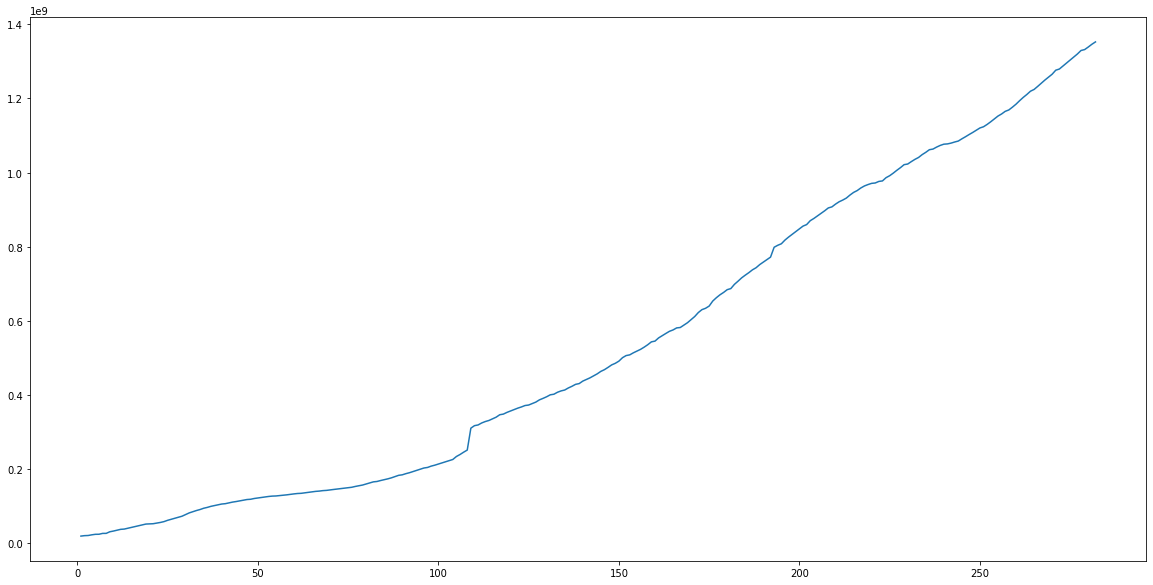

In [61]:
vaccine_dataframe['total'].plot(figsize = (20,10))

In [62]:
X = vaccine_dataframe[['tot_dose_2']]
y = vaccine_dataframe[['date_index']]

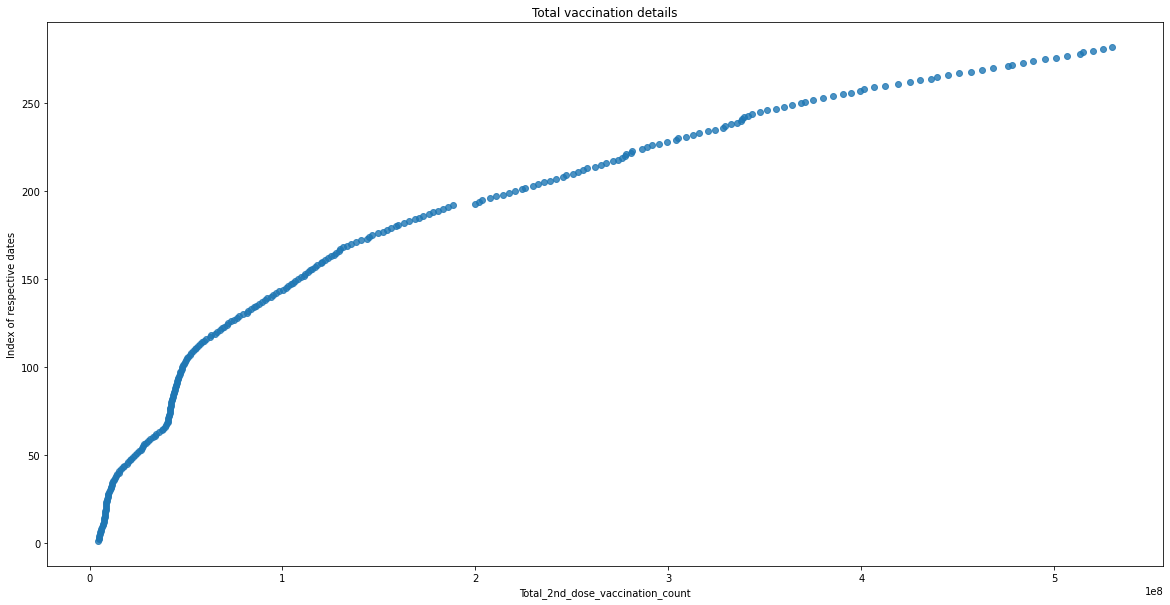

In [63]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.8)
plt.title('Total vaccination details')
plt.xlabel('Total_2nd_dose_vaccination_count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [64]:
y.shape


(282, 1)

In [65]:
#Creating an instance of Linear Regression Library
regression = LinearRegression()

regression.fit(X, y)

LinearRegression()

In [66]:
m = regression.coef_  
m = float(m)
m

5.215015262104619e-07

In [67]:
c = regression.intercept_
c = float(c)
c

61.90850205402751

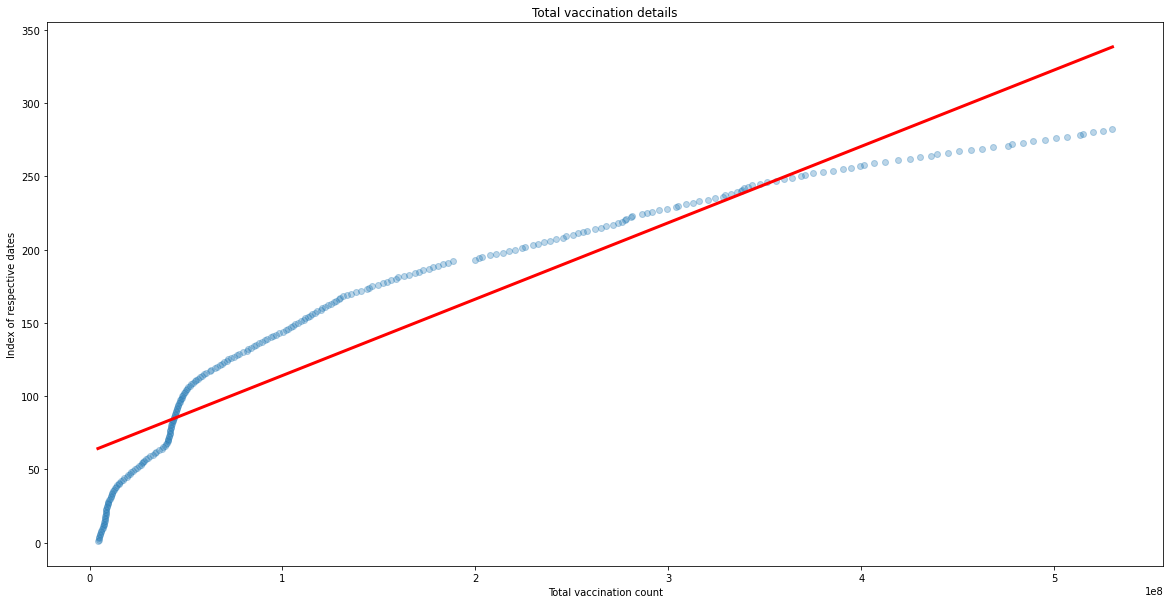

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)


plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [69]:
regression.score(X, y)

0.8729011132096585

In [70]:
x0 = 958174818

In [71]:
y0 = (m*x0) + c

In [72]:
y0

561.5981320174591

In [73]:
# Date for fully vaccination
fully_vaccination_date = start_date + timedelta(y0)
fully_vaccination_date

datetime.date(2022, 9, 20)

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
linreg=reg.fit(X, y)
linreg.score(X, y)
li=linreg.predict([[958174818]])
print(li)

[[561.59813202]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [75]:
li

array([[561.59813202]])

In [76]:
fully_vaccination_date2 = start_date + timedelta(int(li))
fully_vaccination_date2

datetime.date(2022, 9, 20)

<AxesSubplot:>

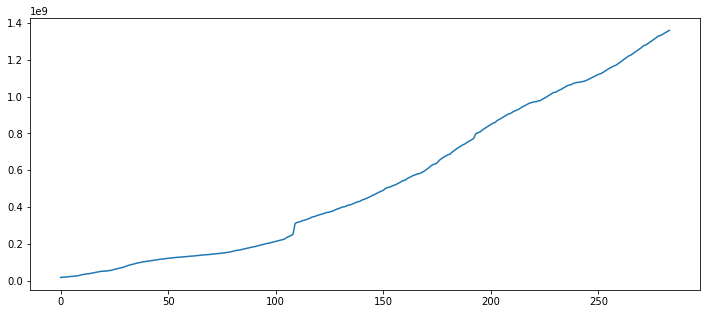

In [77]:
vaccine_dataframe1['total'].plot(figsize=(12,5))

In [35]:
!pip install sktime[all_extras]

  Using cached statsmodels-0.12.1-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1


In [78]:
vaccine_dataframe

,date_index,dates_vaccine,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,vac_18_25,vac_25_40,vac_40_60,above_60,aefi,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
1,1,2021-03-09,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-03-10,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-03-11,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-03-12,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-03-13,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,278,2021-12-11,1329632246,679092364,646054420,306334,1179505367,144795630,8903120,816062191.0,513570055.0,1.329632e+09,0.0,0.0,0.0,0.0,37785.0,2289161.0,6613959.0,4316671.0,4584196.0,2253.0,163.0,1152121.0,7618392.0,2050927.0,5567465.0
279,279,2021-12-12,1332080765,680323004,647271648,306985,1181729218,145019441,1884923,817015228.0,515065537.0,1.332081e+09,0.0,0.0,0.0,0.0,37901.0,726834.0,1158089.0,955939.0,928473.0,511.0,27.0,1152978.0,8938070.0,2303902.0,6634168.0
280,280,2021-12-13,1338966546,683708234,650770436,308748,1188051086,145582163,6655126,818972793.0,519993753.0,1.338967e+09,0.0,0.0,0.0,0.0,37942.0,1860483.0,4794643.0,3268802.0,3384619.0,1704.0,318.0,1154169.0,1899465.0,734918.0,1164547.0
281,281,2021-12-14,1346406033,687358920,654557272,310713,1194888934,146182587,6840844,821007374.0,525398659.0,1.346406e+09,0.0,0.0,0.0,0.0,38235.0,1822766.0,5018078.0,3352794.0,3486215.0,1835.0,217.0,1155384.0,6685988.0,1873371.0,4812617.0


In [88]:
vac=vaccine_dataframe[["dates_vaccine","tot_dose_2"]]

In [89]:
vac

,dates_vaccine,tot_dose_2
1,2021-03-09,4357037.0
2,2021-03-10,4665762.0
3,2021-03-11,4749612.0
4,2021-03-12,5160140.0
5,2021-03-13,5460862.0
...,...,...
278,2021-12-11,513570055.0
279,2021-12-12,515065537.0
280,2021-12-13,519993753.0
281,2021-12-14,525398659.0


In [90]:
vac=vac.set_index((vac.select_dtypes(include=[np.datetime64]).columns).tolist())

In [91]:
vac

,tot_dose_2
dates_vaccine,
2021-03-09,4357037.0
2021-03-10,4665762.0
2021-03-11,4749612.0
2021-03-12,5160140.0
2021-03-13,5460862.0
...,...
2021-12-11,513570055.0
2021-12-12,515065537.0
2021-12-13,519993753.0


In [92]:
vac.index = pd.PeriodIndex(vac.index, freq="D")

In [93]:
vac

,tot_dose_2
dates_vaccine,
2021-03-09,4357037.0
2021-03-10,4665762.0
2021-03-11,4749612.0
2021-03-12,5160140.0
2021-03-13,5460862.0
...,...
2021-12-11,513570055.0
2021-12-12,515065537.0
2021-12-13,519993753.0


In [94]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(d=4, max_p=2, max_q=2, suppress_warnings=True)
forecaster.fit(vac)


AutoARIMA(d=4, max_p=2, max_q=2, suppress_warnings=True)

In [100]:
from sktime.forecasting.base import ForecastingHorizon

In [101]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2021-12-15", periods=200, freq="D")), is_relative=False
)
fh

ForecastingHorizon(['2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
             '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
             '2021-12-23', '2021-12-24',
             ...
             '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
             '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
             '2022-07-01', '2022-07-02'],
            dtype='period[D]', length=200, freq='D', is_relative=False)

In [102]:
y_pred = forecaster.predict(fh)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "


In [115]:
y_pred.astype('int64')>668174818

,tot_dose_2
2021-12-15,False
2021-12-16,False
2021-12-17,False
2021-12-18,False
2021-12-19,False
...,...
2022-06-28,True
2022-06-29,True
2022-06-30,True
2022-07-01,True


In [ ]:
y_pred.loc[y_pred["tot_dose_2"]>668174818]

In [127]:
y_pred[y_pred.tot_dose_2>=668174818]

,tot_dose_2
2022-01-08,6.698329e+08
2022-01-09,6.764092e+08
2022-01-10,6.830451e+08
2022-01-11,6.897405e+08
2022-01-12,6.964954e+08
...,...
2022-06-28,2.561534e+09
2022-06-29,2.576534e+09
2022-06-30,2.591574e+09
2022-07-01,2.606652e+09
